In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn .model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

# Prepare

In [3]:
# Data
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()
df.head(3)

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Model

C:\Users\craxiss\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850391, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\craxiss\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741442859, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\craxiss\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679455578, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\craxiss\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

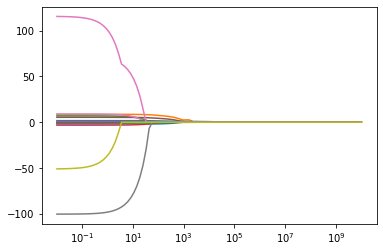

In [4]:
# Model
lasso_model = Lasso().fit(X_train, y_train)

# Loop for alpha
lambdas = 10**np.linspace(10,-2,100)*0.5
factors = []

for i in lambdas:
    lasso_model_2 = Lasso(alpha=i).fit(X_train, y_train)
    factors.append(lasso_model_2.coef_)

# Plot
ax = plt.gca()
ax.plot(lambdas*2, factors)
ax.set_xscale('log');

# Predict

In [5]:
y_pred = lasso_model.predict(X_test)

print(f"R2 Score: {np.sqrt(r2_score(y_test, y_pred))}\n"
      f"MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

R2 Score: 0.6436054547031602
MSE Score: 356.09758845540335


# Model Tuning

In [6]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000, normalize=True).fit(X_train, y_train)

In [7]:
lasso_tuned_model = Lasso(alpha=lasso_cv.alpha_).fit(X_train, y_train);

C:\Users\craxiss\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523975, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [8]:
y_pred=lasso_tuned_model.predict(X_test)

print(f"R2 Score: {np.sqrt(r2_score(y_test, y_pred))}\n"
      f"MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}\n"
      f"Optimized Alpha: {lasso_cv.alpha_}")

R2 Score: 0.6425175134317526
MSE Score: 356.5226376958368
Optimized Alpha: 0.39406126432470073
